<a href="https://colab.research.google.com/github/Shurbur/4210_Assignment5/blob/main/association_rule_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#-------------------------------------------------------------------------
# AUTHOR: your name
# FILENAME: title of the source file
# SPECIFICATION: description of the program
# FOR: CS 4200- Assignment #5
# TIME SPENT: how long it took you to complete the assignment
#-----------------------------------------------------------*/

!pip install mlxtend


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

#Use the command: "pip install mlxtend" on your terminal to install the mlxtend library

#read the dataset using pandas
df = pd.read_csv('/content/drive/MyDrive/Project 5_4210/project 5_4210_assosiation/retail_dataset.csv', sep=',')




In [ ]:
#find the unique items all over the data an store them in the set below
itemset = set()
for i in range(0, len(df.columns)):
    items = (df[str(i)].unique())
    #print(items)
    itemset = itemset.union(set(items))

#remove nan (empty) values by using:
itemset.remove(np.nan)
print(itemset)


{'Pencil', 'Wine', 'Diaper', 'Cheese', 'Bread', 'Eggs', 'Milk', 'Bagel', 'Meat'}


In [ ]:
#To make use of the apriori module given by mlxtend library, we need to convert the dataset accordingly. Apriori module requires a
# dataframe that has either 0 and 1 or True and False as data.
#Example:

#Bread Wine Eggs
#1     0    1
#0     1    1
#1     1    1

#To do that, create a dictionary (labels) for each transaction, store the corresponding values for each item (e.g., {'Bread': 0, 'Milk': 1}) in that transaction,
#and when is completed, append the dictionary to the list encoded_vals below (this is done for each transaction)
#-->add your python code below

encoded_vals = []
for index, row in df.iterrows():
    #print (index)
   # print (row)
    #print("next row")
    labels = {}
    #print(count)
    count = 0
    #print(row)
    for item in itemset:
      count+=1
      if item not in row:
          print(item)
          print(row)
          labels[item] = 0
      for groc in row:
        #print(groc)
        if item == groc:
          #print(item)
          labels[item] = 1
        
    encoded_vals.append(labels)
print (encoded_vals)


Streaming output truncated to the last 5000 lines.
4      Wine
5      Milk
6     Bread
Name: 253, dtype: object
Cheese
0    Cheese
1      Eggs
2      Meat
3    Diaper
4      Wine
5      Milk
6     Bread
Name: 253, dtype: object
Bread
0    Cheese
1      Eggs
2      Meat
3    Diaper
4      Wine
5      Milk
6     Bread
Name: 253, dtype: object
Eggs
0    Cheese
1      Eggs
2      Meat
3    Diaper
4      Wine
5      Milk
6     Bread
Name: 253, dtype: object
Milk
0    Cheese
1      Eggs
2      Meat
3    Diaper
4      Wine
5      Milk
6     Bread
Name: 253, dtype: object
Bagel
0    Cheese
1      Eggs
2      Meat
3    Diaper
4      Wine
5      Milk
6     Bread
Name: 253, dtype: object
Meat
0    Cheese
1      Eggs
2      Meat
3    Diaper
4      Wine
5      Milk
6     Bread
Name: 253, dtype: object
Pencil
0    Diaper
1      Eggs
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
Name: 254, dtype: object
Wine
0    Diaper
1      Eggs
2       NaN
3       NaN
4       NaN
5       NaN
6      

['Wine'] -> ['Cheese']
Support:  0.2698412698412698
Confidence:  0.6159420289855072
Prior:  0.4380952380952381
Gain in Confidence:  40.59546313799621

['Eggs'] -> ['Cheese']
Support:  0.2984126984126984
Confidence:  0.6811594202898551
Prior:  0.4380952380952381
Gain in Confidence:  55.48204158790171

['Milk'] -> ['Cheese']
Support:  0.3047619047619048
Confidence:  0.6075949367088608
Prior:  0.5015873015873016
Gain in Confidence:  21.134433584361485

['Cheese'] -> ['Milk']
Support:  0.3047619047619048
Confidence:  0.6075949367088608
Prior:  0.5015873015873016
Gain in Confidence:  21.134433584361485

['Cheese'] -> ['Meat']
Support:  0.3238095238095238
Confidence:  0.6455696202531646
Prior:  0.47619047619047616
Gain in Confidence:  35.569620253164565

['Meat'] -> ['Cheese']
Support:  0.3238095238095238
Confidence:  0.68
Prior:  0.47619047619047616
Gain in Confidence:  42.80000000000001

['Bagel'] -> ['Bread']
Support:  0.27936507936507937
Confidence:  0.6567164179104478
Prior:  0.42539682

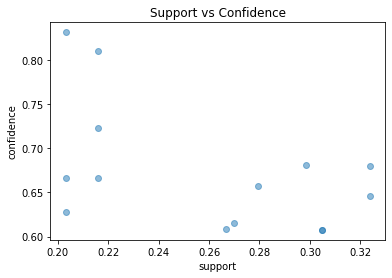

In [ ]:
#adding the populated list with multiple dictionaries to a data frame
ohe_df = pd.DataFrame(encoded_vals)

#calling the apriori algorithm informing some parameters
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
#verbose =1, low
#print(freq_items.itemsets)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)

#iterate the rules data frame and print the apriori algorithm results by using the following format
#Meat, Cheese -> Eggs
#Support: 0.21587301587301588
#Confidence: 0.6666666666666666
#Prior: 0.4380952380952381
#Gain in Confidence: 52.17391304347825
#-->add your python code below

#To calculate the prior and gain in confidence, find in how many transactions the consequent of the rule appears (the supporCount below). Then,
#use the gain formula provided right after.
#prior = suportCount/len(encoded_vals) -> encoded_vals is the number of transactions
#print("Gain in Confidence: " + str(100*(rule_confidence-prior)/prior))
#-->add your python code below
for index, row in rules.iterrows():
  print(list(row.antecedents), "->", list(row.consequents))
  print("Support: ", row.support)
  print("Confidence: ", row.confidence)
  
  prior = min(rules['antecedent support'][index], rules['consequent support'][index])
  print("Prior: ", prior)
  print("Gain in Confidence: ", str(100*(row.confidence-prior)/prior))
  print()
    
  #suportCount[each.itemsets] = freq_items.support* len(encoded_vals)

#Finally, plot support x confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()